In [1]:
import pandas as pd
from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
place2_dataset = pd.read_csv('place2_dataset2_10591.csv')

### Temperature

In [3]:
kern_dens = KernelDensity()
temp_array = place2_dataset['temp'].values.reshape(-1, 1)
kern_dens.fit(temp_array)

temp_scores = kern_dens.score_samples(temp_array)
temp_threshold = quantile(temp_scores, .02)
print(temp_threshold)

-3.184757193838726


In [4]:
temp_idx = where(temp_scores <= temp_threshold)
temp_values = place2_dataset.iloc[temp_idx]
temp_values_index = temp_values.index
temp_values_index

Int64Index([   92,   149,   195,   238,   244,   344,   346,   370,   380,
              410,
            ...
            10157, 10166, 10217, 10289, 10403, 10460, 10465, 10467, 10482,
            10496],
           dtype='int64', length=217)

### Humidity

In [5]:
humidity_array = place2_dataset['humidity'].values.reshape(-1, 1)
kern_dens.fit(humidity_array)

humidity_scores = kern_dens.score_samples(humidity_array)
humidity_threshold = quantile(humidity_scores, .02)
print(humidity_threshold)

-5.265020064599701


In [6]:
humidity_idx = where(humidity_scores <= humidity_threshold)
humidity_values = place2_dataset.iloc[humidity_idx]
humidity_values_index = humidity_values.index
humidity_values_index

Int64Index([  116,   130,   226,   327,   478,   483,   516,   589,   654,
              717,
            ...
             9978,  9987, 10010, 10210, 10276, 10284, 10340, 10416, 10535,
            10582],
           dtype='int64', length=215)

### CO

In [7]:
co_array = place2_dataset['co'].values.reshape(-1, 1)
kern_dens.fit(co_array)

co_scores = kern_dens.score_samples(co_array)
co_threshold = quantile(co_scores, .02)
print(co_threshold)

-0.9189388270093009


In [8]:
co_idx = where(co_scores <= co_threshold)
co_values = place2_dataset.iloc[co_idx]
co_values_index = co_values.index
co_values_index

Int64Index([    7,    67,   117,   129,   153,   163,   164,   180,   187,
              258,
            ...
            10039, 10077, 10170, 10178, 10336, 10339, 10350, 10357, 10519,
            10577],
           dtype='int64', length=214)

### LPG

In [9]:
lpg_array = place2_dataset['lpg'].values.reshape(-1, 1)
kern_dens.fit(lpg_array)

lpg_scores = kern_dens.score_samples(lpg_array)
lpg_threshold = quantile(lpg_scores, .02)
print(lpg_threshold)

-0.9189389239788


In [10]:
lpg_idx = where(lpg_scores <= lpg_threshold)
lpg_values = place2_dataset.iloc[lpg_idx]
lpg_values_index = lpg_values.index
lpg_values_index

Int64Index([    7,    67,   117,   129,   153,   163,   164,   180,   187,
              258,
            ...
            10039, 10077, 10170, 10178, 10336, 10339, 10350, 10357, 10519,
            10577],
           dtype='int64', length=214)

In [11]:
#place2_dataset['Temp Anomaly', 'Humidity Anomaly', 'CO Anomaly', 'LPG Anomaly'] = -1
anomaly_list = [['Temp Anomaly', temp_values_index], ['Humidity Anomaly', humidity_values_index], ['CO Anomaly', co_values_index], ['LPG Anomaly', lpg_values_index]]
for name in anomaly_list:
    place2_dataset[name[0]] = -1
    place2_dataset.loc[name[1], name[0]] = 1

place2_dataset


#place2_dataset.drop(['Temp Anomaly, Humidity Anomaly, CO Anomaly, LPG Anomaly'], axis='columns')
#place2_dataset=place2_dataset.iloc[:, :-1]

,ts,co,humidity,lpg,smoke,temp,Temp Anomaly,Humidity Anomaly,CO Anomaly,LPG Anomaly
0,1.594642e+09,0.004511,59.700001,0.007148,0.018981,23.600000,-1,-1,-1,-1
1,1.594663e+09,0.004207,62.099998,0.006796,0.017986,25.000000,-1,-1,-1,-1
2,1.594701e+09,0.004824,60.200001,0.007503,0.019991,23.900000,-1,-1,-1,-1
3,1.594565e+09,0.004053,69.800003,0.006615,0.017473,25.799999,-1,-1,-1,-1
4,1.594753e+09,0.004797,53.400002,0.007472,0.019902,26.500000,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
10586,1.594619e+09,0.004566,59.900002,0.007210,0.019158,24.799999,-1,-1,-1,-1
10587,1.595136e+09,0.004345,56.400002,0.006957,0.018440,28.000000,-1,-1,-1,-1
10588,1.595136e+09,0.004345,56.299999,0.006957,0.018440,28.000000,-1,-1,-1,-1
10589,1.594978e+09,0.003681,77.400002,0.006170,0.016220,23.700001,-1,-1,-1,-1


In [12]:
anomaly_place2_dataset = place2_dataset[(place2_dataset['Temp Anomaly'] == 1) | (place2_dataset['Humidity Anomaly'] == 1) | (place2_dataset['CO Anomaly'] == 1) | (place2_dataset['LPG Anomaly'] == 1)]
anomaly_place2_dataset

,ts,co,humidity,lpg,smoke,temp,Temp Anomaly,Humidity Anomaly,CO Anomaly,LPG Anomaly
7,1.595119e+09,0.005426,57.700001,0.008169,0.021891,29.000000,-1,-1,1,1
67,1.594699e+09,0.005113,63.299999,0.007825,0.020909,23.400000,-1,-1,1,1
92,1.595109e+09,0.004493,53.599998,0.007126,0.018920,30.600000,1,-1,-1,-1
116,1.594956e+09,0.003817,80.599998,0.006334,0.016682,23.900000,-1,1,-1,-1
117,1.594771e+09,0.005055,51.400002,0.007762,0.020727,26.700001,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...
10496,1.595106e+09,0.004391,52.400002,0.007009,0.018589,30.299999,1,-1,-1,-1
10519,1.594697e+09,0.005046,69.900002,0.007751,0.020696,22.500000,-1,-1,1,1
10535,1.594951e+09,0.003782,82.599998,0.006292,0.016563,24.000000,-1,1,-1,-1
10577,1.594697e+09,0.005058,69.800003,0.007764,0.020735,22.600000,-1,-1,1,1


In [13]:
679/10591

0.06411103767349637

### find the anomaly of temperature

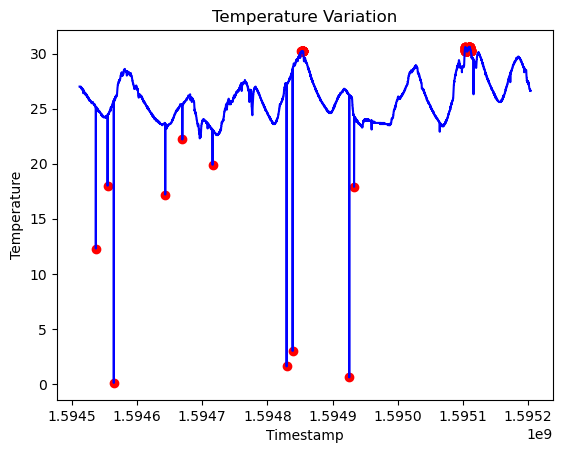

In [14]:
temp_df = place2_dataset[['ts', 'temp', 'Temp Anomaly']].sort_values('ts')
# print(temp_df)

plt.plot(temp_df['ts'], temp_df['temp'], color='b')

anomaly_temp_df = temp_df[temp_df['Temp Anomaly'] == 1]

plt.scatter(anomaly_temp_df['ts'], anomaly_temp_df['temp'], color='r')

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.show()

### find the anomaly of humidity

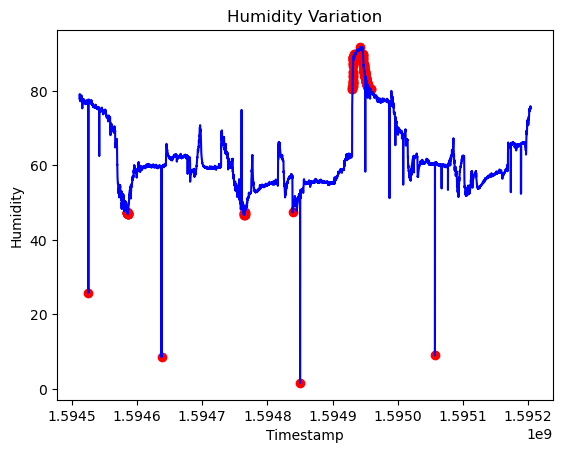

In [17]:
humidity_df = place2_dataset[['ts', 'humidity', 'Humidity Anomaly']].sort_values('ts')
# print(temp_df)

plt.plot(humidity_df['ts'], humidity_df['humidity'], color='b')

anomaly_humidity_df = humidity_df[humidity_df['Humidity Anomaly'] == 1]

plt.scatter(anomaly_humidity_df['ts'], anomaly_humidity_df['humidity'], color='r')

plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.title('Humidity Variation')
plt.show()

### find the anomaly of CO

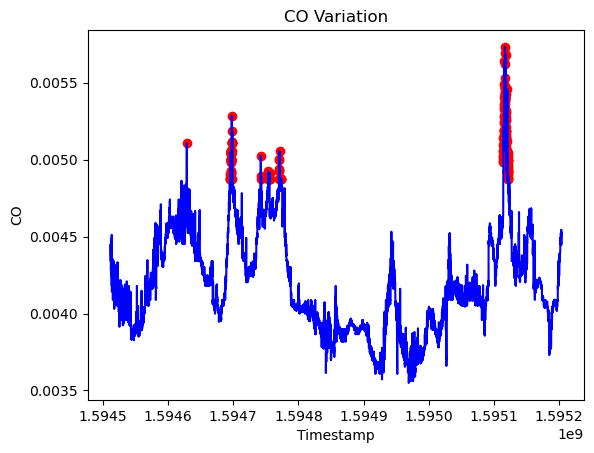

In [18]:
co_df = place2_dataset[['ts', 'co', 'CO Anomaly']].sort_values('ts')
# print(temp_df)

plt.plot(co_df['ts'], co_df['co'], color='b')

anomaly_co_df = co_df[co_df['CO Anomaly'] == 1]

plt.scatter(anomaly_co_df['ts'], anomaly_co_df['co'], color='r')

plt.xlabel('Timestamp')
plt.ylabel('CO')
plt.title('CO Variation')
plt.show()

### find the anomaly of LPG

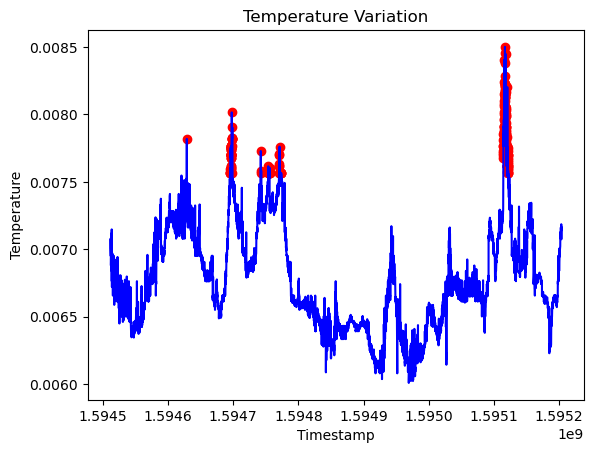

In [20]:
lpg_df = place2_dataset[['ts', 'lpg', 'LPG Anomaly']].sort_values('ts')
# print(temp_df)

plt.plot(lpg_df['ts'], lpg_df['lpg'], color='b')

anomaly_lpg_df = lpg_df[lpg_df['LPG Anomaly'] == 1]

plt.scatter(anomaly_lpg_df['ts'], anomaly_lpg_df['lpg'], color='r')

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.show()

### Correlation

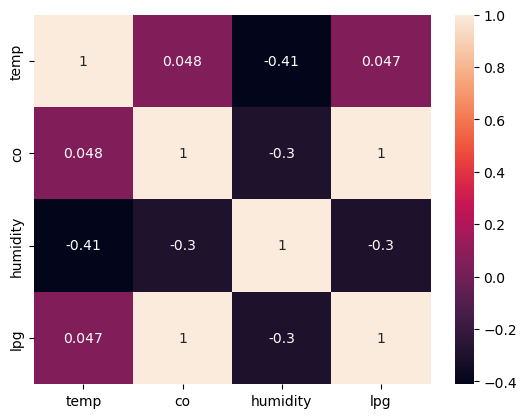

In [21]:
corr_matrix = place2_dataset[[ 'temp', 'co', 'humidity', 'lpg']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
corr_co_and_lpg = place2_dataset[[ 'co', 'lpg', 'CO Anomaly', 'LPG Anomaly']]
corr_co_and_lpg

,co,lpg,CO Anomaly,LPG Anomaly
0,0.004511,0.007148,-1,-1
1,0.004207,0.006796,-1,-1
2,0.004824,0.007503,-1,-1
3,0.004053,0.006615,-1,-1
4,0.004797,0.007472,-1,-1
...,...,...,...,...
10586,0.004566,0.007210,-1,-1
10587,0.004345,0.006957,-1,-1
10588,0.004345,0.006957,-1,-1
10589,0.003681,0.006170,-1,-1


In [23]:
co_and_lpg_anomaly = corr_co_and_lpg[(corr_co_and_lpg['CO Anomaly'] == 1) & (corr_co_and_lpg['LPG Anomaly'] == 1)]
co_and_lpg_anomaly

,co,lpg,CO Anomaly,LPG Anomaly
7,0.005426,0.008169,1,1
67,0.005113,0.007825,1,1
117,0.005055,0.007762,1,1
129,0.005108,0.007820,1,1
153,0.004878,0.007563,1,1
...,...,...,...,...
10339,0.004925,0.007616,1,1
10350,0.005108,0.007820,1,1
10357,0.004997,0.007696,1,1
10519,0.005046,0.007751,1,1


In [24]:
co_or_lpg_anomaly = corr_co_and_lpg[(corr_co_and_lpg['CO Anomaly'] == 1) | (corr_co_and_lpg['LPG Anomaly'] == 1)]
co_or_lpg_anomaly

,co,lpg,CO Anomaly,LPG Anomaly
7,0.005426,0.008169,1,1
67,0.005113,0.007825,1,1
117,0.005055,0.007762,1,1
129,0.005108,0.007820,1,1
153,0.004878,0.007563,1,1
...,...,...,...,...
10339,0.004925,0.007616,1,1
10350,0.005108,0.007820,1,1
10357,0.004997,0.007696,1,1
10519,0.005046,0.007751,1,1


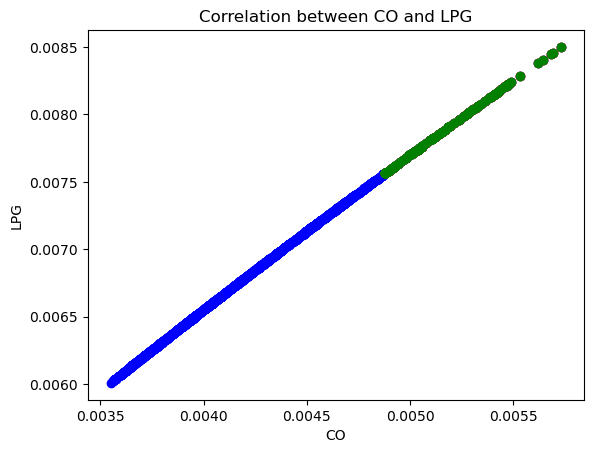

In [25]:
plt.scatter(place2_dataset['co'], place2_dataset['lpg'], color='b')
plt.scatter(co_or_lpg_anomaly['co'], co_or_lpg_anomaly['lpg'], color='r')
plt.scatter(co_and_lpg_anomaly['co'], co_and_lpg_anomaly['lpg'], color='g')

plt.xlabel('CO')
plt.ylabel('LPG')
plt.title('Correlation between CO and LPG')
plt.show()